# **Eksplorasi Data dan Pra-pemrosesan Ulasan Produk Tokopedia**

Notebook ini berisi proses eksplorasi data dan pra-pemrosesan teks, meliputi pembersihan dan normalisasi data, sehingga menghasilkan dataset bersih yang siap digunakan untuk pemodelan. Dataset hasil preprocessing kemudian disimpan untuk digunakan pada tahap pemodelan Machine Learning dan Deep Learning.

## **Import Library**

In [ ]:
%pip install nltk
%pip install Sastrawi
%pip install tqdm
%pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Manipulasi data
import pandas as pd

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text processing
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Progress bar
from tqdm.notebook import tqdm

# Download resource NLTK
nltk.download('stopwords')

# Enable progress_apply for pandas
tqdm.pandas()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEVIRA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Load Dataset**

In [ ]:
# Load dataset langsung dari Google Drive
url = 'https://drive.google.com/uc?export=download&id=1P1MBNpj8dI0hoWXh8nUnOOGhlpY4-qAh'
df = pd.read_csv(url)

# Informasi dataset
print("Jumlah data (baris, kolom):", df.shape)

print("\nNama kolom:")
for col in df.columns:
    print("-", col)

print("\n5 baris pertama:")
df.head()

Jumlah data (baris, kolom): (40607, 9)

Nama kolom:
- Unnamed: 0
- text
- rating
- category
- product_name
- product_id
- sold
- shop_id
- product_url

5 baris pertama:


,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,1,Barang sesuai pesanan dan cepat sampai,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...
1,2,Barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
2,3,Paket rapi...mantap....cepat....sampe ke tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
3,4,ya saya puas dgn barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...
4,5,Responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...


## **EDA Dasar**

### Informasi Umum

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40607 entries, 0 to 40606
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    40607 non-null  int64 
 1   text          40607 non-null  object
 2   rating        40607 non-null  int64 
 3   category      40607 non-null  object
 4   product_name  40607 non-null  object
 5   product_id    40607 non-null  int64 
 6   sold          40593 non-null  object
 7   shop_id       40607 non-null  int64 
 8   product_url   40607 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.8+ MB


### Missing Values

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
text,0
rating,0
category,0
product_name,0
product_id,0
sold,14
shop_id,0
product_url,0


### Duplikasi Data

In [ ]:
print("Jumlah duplikasi:", df.duplicated().sum())

Jumlah duplikasi: 0


### Distribusi Rating

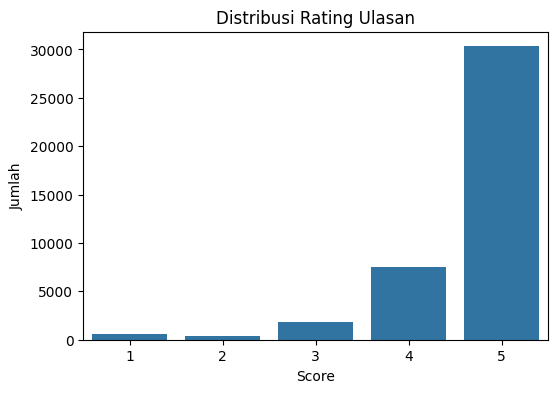

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df)
plt.title('Distribusi Rating Ulasan')
plt.xlabel('Score')
plt.ylabel('Jumlah')
plt.show()

## **Labeling Sentimen**

In [ ]:
# Label teks
df['sentiment'] = df['rating'].apply(
    lambda x: 'positive' if x >= 4 else ('neutral' if x == 3 else 'negative')
)

# Label numerik
df['sentiment_num'] = df['rating'].apply(
    lambda x: 1 if x >= 4 else (0 if x == 3 else -1)
)

df[['text', 'rating', 'sentiment', 'sentiment_num']].head()


,text,rating,sentiment,sentiment_num
0,Barang sesuai pesanan dan cepat sampai,5,positive,1
1,Barang bagus harga murah,5,positive,1
2,Paket rapi...mantap....cepat....sampe ke tujuan,5,positive,1
3,ya saya puas dgn barangnya,5,positive,1
4,Responya luar biasa b mantap,5,positive,1


### Distribusi Label Sentimen

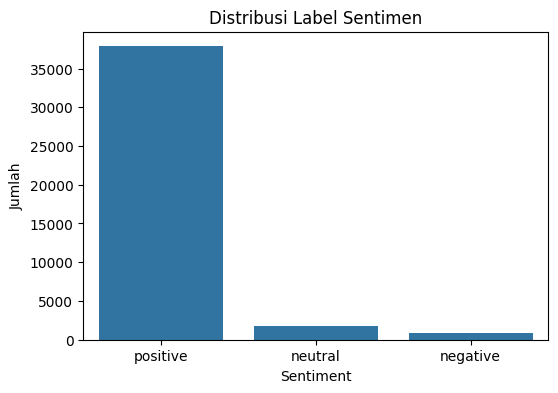

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='sentiment',
    data=df,
    order=['positive', 'neutral', 'negative']
)
plt.title('Distribusi Label Sentimen')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.show()

## **Seleksi dan Pembersihan Kolom**

### Drop Kolom Tidak Relevan

In [ ]:
df = df.drop(columns=[
    'Unnamed: 0',
    'category',
    'product_name',
    'product_id',
    'sold',
    'shop_id',
    'product_url'
])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40607 entries, 0 to 40606
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           40607 non-null  object
 1   rating         40607 non-null  int64 
 2   sentiment      40607 non-null  object
 3   sentiment_num  40607 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


## **Text Preprocessing**

### Inisialisasi Stopword & Stemmer

In [ ]:
# Inisialisasi stopword bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

### Fungsi Preprocessing Teks

In [ ]:
def preprocess_text(text):
    # Case folding
    text = text.lower()

    # Cleaning text
    text = re.sub(r'http\S+', '', text)        # hapus URL
    text = re.sub(r'[^a-z\s]', '', text)       # hapus angka & simbol
    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih

    # Stopword removal + stemming
    tokens = []
    for word in text.split():
        if word not in stop_words:
            tokens.append(stemmer.stem(word))

    return ' '.join(tokens)

### Terapkan Preprocessing ke Kolom Teks

In [ ]:
df['clean_text'] = df['text'].progress_apply(preprocess_text)

df[['text', 'clean_text']].head()

  0%|          | 0/40607 [00:00<?, ?it/s]

,text,clean_text
0,Barang sesuai pesanan dan cepat sampai,barang sesuai pesan cepat
1,Barang bagus harga murah,barang bagus harga murah
2,Paket rapi...mantap....cepat....sampe ke tujuan,paket rapimantapcepatsampe tuju
3,ya saya puas dgn barangnya,ya puas dgn barang
4,Responya luar biasa b mantap,responya b mantap


## **Hasil Preprocessing**

In [ ]:
# Contoh Sebelum & Sesudah
df[['text', 'clean_text']].sample(2, random_state=42)

,text,clean_text
40055,Packing nya rapih dan cepat,packing nya rapih cepat
37788,"terima kasih,, barang telah diterima,,",terima kasih barang terima


In [ ]:
# Cek Teks Kosong
print("Jumlah clean_text kosong:", (df['clean_text'] == '').sum())

Jumlah clean_text kosong: 223


In [ ]:
# Panjang Rata-rata Teks Setelah Preprocessing
df['text_length'] = df['clean_text'].str.split().str.len()
print("Rata-rata panjang teks:", df['text_length'].mean())

Rata-rata panjang teks: 5.964316497155663


In [ ]:
# Drop teks hasil preprocessing yang kosong
df = df[df['clean_text'].str.strip() != '']

print("Jumlah data setelah drop clean_text kosong:", df.shape[0])

Jumlah data setelah drop clean_text kosong: 40384


### Dataset Siap Modeling

In [ ]:
# Dataset Final
final_df = df[['clean_text', 'sentiment_num']].copy()
final_df.head()

,clean_text,sentiment_num
0,barang sesuai pesan cepat,1
1,barang bagus harga murah,1
2,paket rapimantapcepatsampe tuju,1
3,ya puas dgn barang,1
4,responya b mantap,1


In [ ]:
# Simpan Dataset
final_df.to_csv('dataset_preprocessed.csv', index=False)

## **Visualisasi Data Setelah Preprocessing**

C:\Users\DEVIRA\AppData\Local\Temp\ipykernel_20436\924381439.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Positive', 'Neutral', 'Negative'])


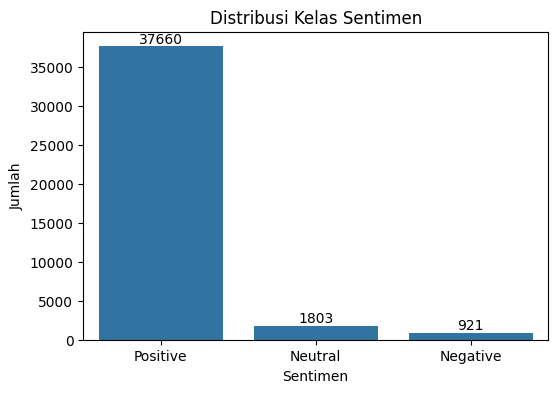

In [ ]:
# Cek Distribusi Kelas Sentimen
plt.figure(figsize=(6,4))
ax = sns.countplot(
    x='sentiment_num',
    data=df,
    order=[1, 0, -1]
)

# Ganti label angka ke teks
ax.set_xticklabels(['Positive', 'Neutral', 'Negative'])

plt.title('Distribusi Kelas Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')

# Tampilkan jumlah di atas bar
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.show()


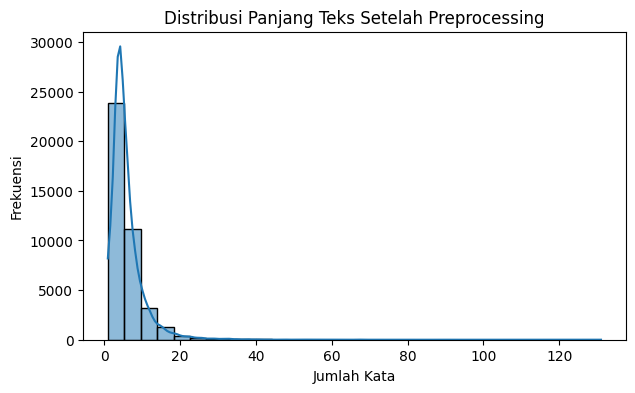

In [ ]:
# Distribusi Panjang Teks (Clean Text)
df['text_length'] = df['clean_text'].str.split().str.len()

plt.figure(figsize=(7,4))
sns.histplot(df['text_length'], bins=30, kde=True)

plt.title('Distribusi Panjang Teks Setelah Preprocessing')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

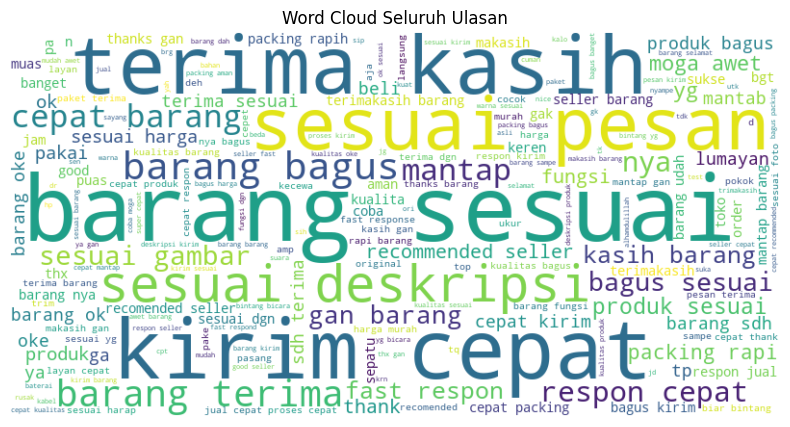

In [ ]:
# WordCloud Seluruh Data
all_text = ' '.join(df['clean_text'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Seluruh Ulasan')
plt.show()

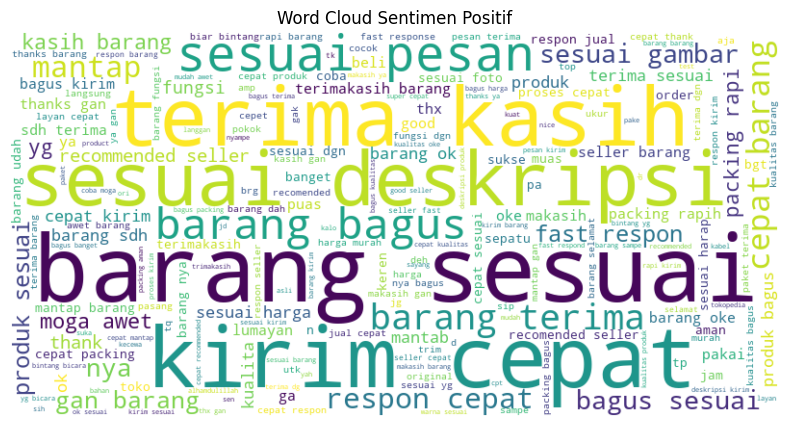

In [ ]:
# WordCloud Sentimen Positif
positive_text = ' '.join(df[df['sentiment_num'] == 1]['clean_text'])

wordcloud_pos = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Positif')
plt.show()

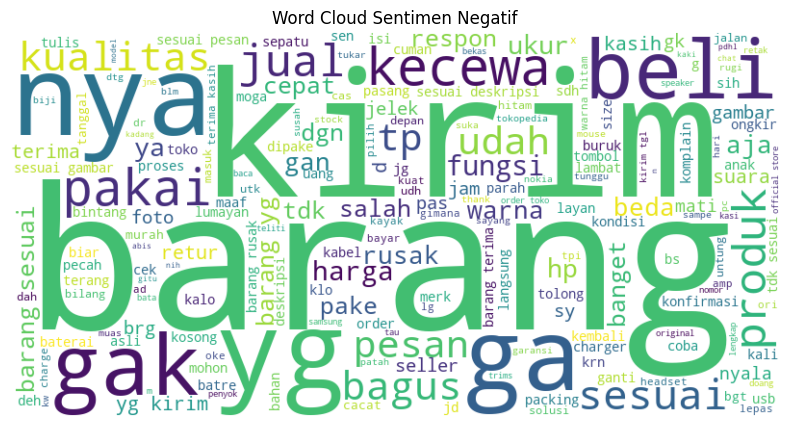

In [ ]:
# WordCloud Sentimen Negatif
negative_text = ' '.join(df[df['sentiment_num'] == -1]['clean_text'])

wordcloud_neg = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Negatif')
plt.show()